# Chapter 15 in chapter exercises

In [2]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 15.1: Geometric view of regression

In [4]:
# data
N = 9
x = np.linspace(-1,4,N)
y = 1 + x + np.random.randn(N)

# get GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

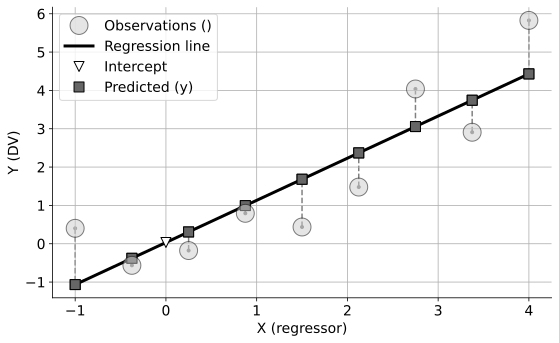

In [5]:
_,axs = plt.subplots(1,1,figsize=(8,5))

# plot the data
axs.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5,label='Observations ()')
axs.set(xlabel='X (regressor)',ylabel='Y (DV)')

# plot the regression line
axs.plot(x,yHat,'k-',linewidth=3,label='Regression line')

# plot the intercept
intpnt = mdl.predict([1,0])
axs.plot(0,intpnt,'kv',markersize=10,markerfacecolor='w',label='Intercept',zorder=10)


# data-point-specific projection lines
for i in range(N):
  axs.plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)
  axs.plot([x[i],x[i]],[yHat[i],yHat[i]],'ks',markersize=10,markerfacecolor=(.4,.4,.4),label=r'Predicted (y)')


# add the residuals
labh,labels = axs.get_legend_handles_labels() # to prevent redundant 'Predicted' labels
axs.legend(labh[:4],labels[:4]) # only the first four (unique) legends
axs.grid()

# display the figure
plt.tight_layout()
plt.show()

### Fig 15.2: Regression vs. PCA

In [6]:
# data
N = 10
x = np.linspace(-1.5,1.5,N)
y = x + np.random.randn(N)

# mean-center variables
y -= np.mean(y)
maxval = np.max(np.abs(y))*1.1 # for axis scaling; PCA projections look orthogonal in square axes

# get GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

# compute PCA
data = np.vstack((x,y)).T
C = np.cov(data.T)
evals,evecs = np.linalg.eig(C)
PC = evecs[:,np.argmax(evals)]

# projection points
pcaX = np.zeros(N)
pcaY = np.zeros(N)

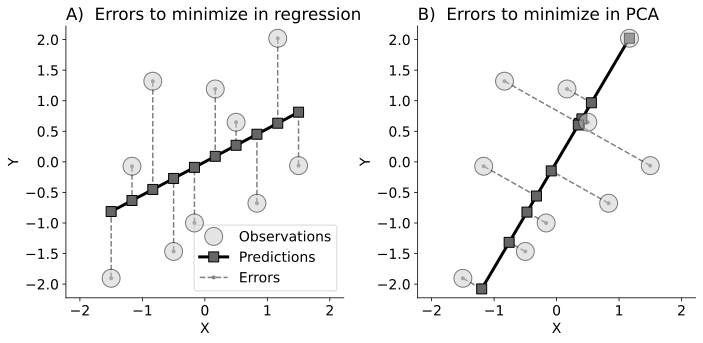

In [7]:
_,axs = plt.subplots(1,2,figsize=(10,5))

# plot the data
for a in axs:
  a.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5)
  a.set(xlabel='X',ylabel='Y',xlim=[-maxval,maxval],ylim=[-maxval,maxval])

# plot the regression line
axs[0].plot(x,yHat,'ks-',linewidth=3,markersize=10,markerfacecolor=(.4,.4,.4))


# data-point-specific projection lines
for i in range(N):

  # regression is the projection onto the best fit line, holding 'x' constant
  axs[0].plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)

  # compute and plot the PCA projection lines
  pcaX[i],pcaY[i] = data[i,:]@PC*PC
  axs[1].plot([x[i],pcaX[i]],[y[i],pcaY[i]],'--.',color='gray',zorder=-4)


# now plot the PCA line
axs[1].plot(pcaX,pcaY,'ks-',linewidth=3,markersize=10,markerfacecolor=(.4,.4,.4))


# final adjustments
axs[0].set_title(r'A)  Errors to minimize in regression')
axs[0].legend(['Observations','Predictions','Errors'])

axs[1].set_title(r'B)  Errors to minimize in PCA')


plt.tight_layout()
plt.show()

### Fig 15.3

In [8]:
# the data
icecream  = np.array([ 1, 2, 4, 5, 7 ])
happiness = np.array([ 5, 6.5, 6, 8, 9 ])

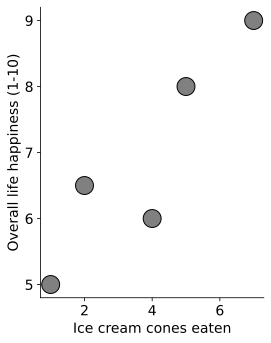

In [9]:
plt.figure(figsize=(4,5))
plt.plot(icecream,happiness,'ko',markerfacecolor='gray',markersize=18)
plt.xlabel('Ice cream cones eaten')
plt.ylabel('Overall life happiness (1-10)')
plt.yticks(range(5,10))

plt.tight_layout()
plt.show()

In [10]:
# regression

# organize the IVs into a design matrix
designMatrix = np.vstack((
    np.ones(5,),  # intercept
    icecream      # number of ice cream cones eaten
    )).T

# list of labels for model output
IVnames = ['Intercept','Ice Cream']

# evaluate the regression model (endog=DV, exog=IVs)
regResults = sm.OLS(happiness,designMatrix).fit()

# and print a summary of the results
t = regResults.summary(xname=IVnames,yname='Happiness')
t.as_text

/home/akanksha/Documents/Stuff/Projects/Code_Py/modern_statistics_book/svenv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     14.73
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0312
Time:                        22:37:57   Log-Likelihood:                -4.4354
No. Observations:                   5   AIC:                             12.87
Df Residuals:                       3   BIC:                             12.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Fig 15.4: geometry of regression

In [11]:
# data
N = 9
x = np.linspace(-1,4,N)
y = 1 + x + np.random.randn(N)

# GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

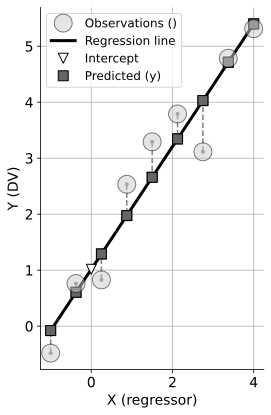

In [12]:
_,axs = plt.subplots(1,1,figsize=(4,6))

# plot the data
axs.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5,label='Observations ()')
axs.set(xlabel='X (regressor)',ylabel='Y (DV)')

# plot the regression line
axs.plot(x,yHat,'k-',linewidth=3,label='Regression line')

# plot the intercept
intpnt = mdl.predict([1,0])
axs.plot(0,intpnt,'kv',markersize=10,markerfacecolor='w',label='Intercept',zorder=10)


# data-point-specific projection lines
for i in range(N):
  axs.plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)
  axs.plot([x[i],x[i]],[yHat[i],yHat[i]],'ks',markersize=10,markerfacecolor=(.4,.4,.4),label=r'Predicted (y)')


# add the residuals
labh,labels = axs.get_legend_handles_labels() # to prevent redundant 'Predicted' labels
axs.legend(labh[:4],labels[:4],fontsize=12) # only the first four (unique) legends
axs.grid()

# display the figure
plt.tight_layout()
plt.show()

### Fig 15.6: Simulating regression data- example 1

In [13]:
# coefficients for linking the IV to the DV
B0 = 50  # intercept (cm)
B1 =  6  # coefficient for change in age (cm)

# number of observations
N = 135

# the independent variable
age = np.random.uniform(0,20,N)

# the noise
noise = np.random.normal(0,15,N)

# put it together to simulate the data
height = B0 + B1*age + noise


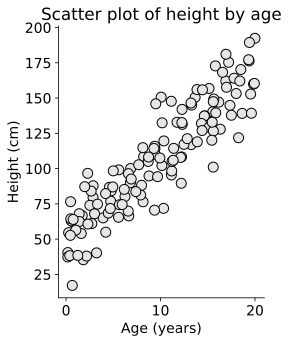

In [14]:
# plot
plt.figure(figsize=(4,5))

plt.plot(age,height,'ko',markerfacecolor=(.9,.9,.9),markersize=10)
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.title('Scatter plot of height by age',loc='center')

# display the figure
plt.tight_layout()
plt.show()

In [15]:
# regression

# organize the IVs into a design matrix
designMatrix = np.vstack((
    np.ones(N,),  # intercept
    age           # age IV
    )).T

# list of labels for model output
IVnames = ['Intercept','Age']

# evaluate the regression model (endog=DV, exog=IVs)
regResults = sm.OLS(endog=height, exog=designMatrix).fit()

# print a summary of the results
t = regResults.summary(xname=IVnames, yname='Height')
t.as_text

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     604.0
Date:                Mon, 26 May 2025   Prob (F-statistic):           2.69e-51
Time:                        22:37:58   Log-Likelihood:                -571.28
No. Observations:                 135   AIC:                             1147.
Df Residuals:                     133   BIC:                             1152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Fig 15.7: Visualizing the regression data

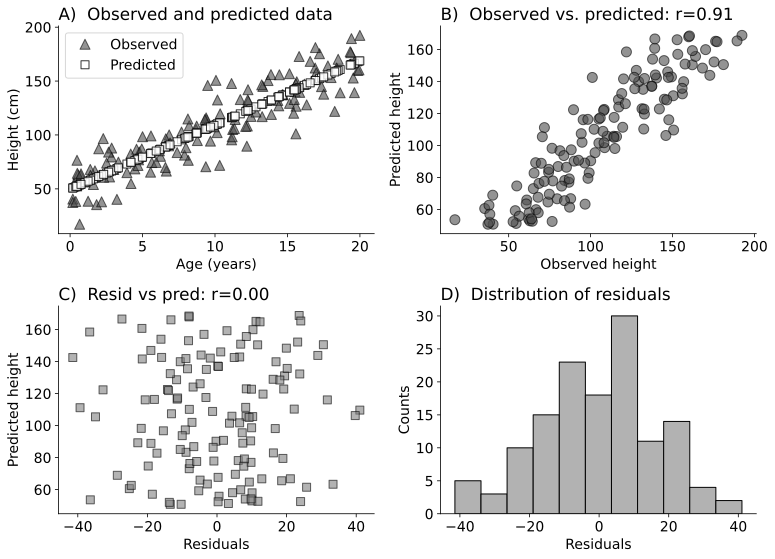

In [16]:
# plot the predicted data
yHat = regResults.predict()
resid = regResults.resid


_,axs = plt.subplots(2,2,figsize=(11,8))

axs[0,0].plot(age,height,'k^',markerfacecolor=(.3,.3,.3),alpha=.6,markersize=10,label='Observed')
axs[0,0].plot(age,yHat,'ks',markerfacecolor='w',alpha=.8,markersize=8,label='Predicted')
axs[0,0].set(xlabel='Age (years)',ylabel='Height (cm)')
axs[0,0].set_title(fr'A)  Observed and predicted data')
axs[0,0].legend()

axs[0,1].plot(height,yHat,'ko',markerfacecolor=(.3,.3,.3),alpha=.6,markersize=10)
axs[0,1].set(xlabel='Observed height',ylabel='Predicted height')
axs[0,1].set_title(fr'B)  Observed vs. predicted: r={np.corrcoef(height,yHat)[0,1]:.2f}')

axs[1,0].plot(resid,yHat,'ks',markerfacecolor=(.5,.5,.5),alpha=.6,markersize=8)
axs[1,0].set(xlabel='Residuals',ylabel='Predicted height')
axs[1,0].set_title(fr'C)  Resid vs pred: r={np.corrcoef(resid,yHat)[0,1]:.2f}')

axs[1,1].hist(resid,bins='fd',edgecolor='k',facecolor=(.7,.7,.7))
axs[1,1].set(xlabel='Residuals',ylabel='Counts')
axs[1,1].set_title(fr'D)  Distribution of residuals')


plt.tight_layout()
plt.show()
     

### Fig 15.8: Simulating regression data: example 2

In [17]:
# create coefficients for linking IV to DV
B0 = 600  # intercept
B1 = -2   # brightness manipulation (coefficient)
B2 = 60   # experiment condition (coefficient)
B3 = -2.5 # interaction term (coefficient)


# number of observations
N = 100

# generate independent variables
brightness = np.random.uniform(10,100,N) # continuous IV
category = (np.linspace(0,1,N)>.5)+0 # binary IV

# noise
noise = np.random.normal(0,50,N)


# generate the data according to the model
RT = B0 + B1*brightness + B2*category + B3*(brightness*category) + noise

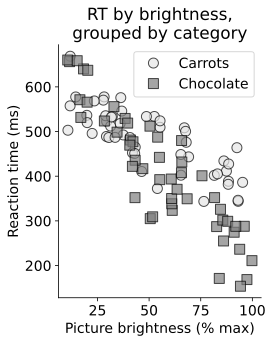

In [18]:
plt.figure(figsize=(4,5))

plt.plot(brightness[category==0],RT[category==0],'ko',markerfacecolor=(.9,.9,.9),alpha=.7,markersize=10,label='Carrots')
plt.plot(brightness[category==1],RT[category==1],'ks',markerfacecolor=(.5,.5,.5),alpha=.7,markersize=10,label='Chocolate')
plt.xlabel('Picture brightness (% max)')
plt.ylabel('Reaction time (ms)')
plt.legend()
plt.title(f'RT by brightness,\ngrouped by category',loc='center')

plt.tight_layout()
plt.show()
     

In [19]:
# regression model using dataframe

# construct the design matrix as a dataframe
df = pd.DataFrame({
    'Brightness' : brightness,
    'Category'   : category,
    #'Interaction': brightness * category # uncomment to include interaction term
})

# add an intercept term (sm calls it "constant")
X = sm.add_constant(df)

# inspect the design matrix:
X # (const = intercept)

,const,Brightness,Category
0,1.0,55.295223,0
1,1.0,29.437369,0
2,1.0,81.551634,0
3,1.0,52.531362,0
4,1.0,29.346817,0
...,...,...,...
95,1.0,41.915600,1
96,1.0,60.731447,1
97,1.0,43.160135,1
98,1.0,51.713332,1


In [20]:
# fit the model
model = sm.OLS(RT,X).fit()

# show the regression summary (rich formatted table)
model.summary()
     


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.34e-27
Time:                        22:37:58   Log-Likelihood:                -549.95
No. Observations:                 100   AIC:                             1106.
Df Residuals:                      97   BIC:                             1114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        652.8932     14.459     45.155      0.000     624.196     681.590
Brightness    -3.4046      0.232    -14.680      0.000      -3.865      -2.944
Category     -50.3751     12.099     -4.164      0.000     -74.388     -26.362
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.520
Skew:                          -0.196   Prob(JB):                        0.468
Kurtosis:                       2.541   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fig 15.9-15.10: Visualizing example 2

In [21]:
# predicted RT and residuals
df['Predicted RT'] = model.predict(X)
df['Residuals'] = df['Predicted RT'] - RT

# change the values of the dummy-coded variables
df['Food'] = df['Category'].map({0:'Carrots', 1:'Chocolate'})
colorPalette = {'Carrots':(.7,.7,.7),'Chocolate':(.2,.2,.2)} # color map

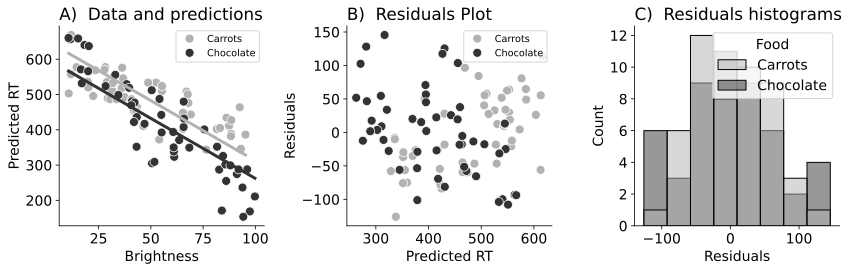

In [22]:
fig,axs = plt.subplots(1,3,figsize=(12,4))

# scatter plot of observed data
sns.scatterplot(x='Brightness',y=RT,hue='Food',data=df,
                ax=axs[0],s=80,palette=colorPalette)

# line plot of model predictions
sns.lineplot(x='Brightness',y='Predicted RT',hue='Food',data=df,legend=False,
             ax=axs[0],palette=colorPalette,linewidth=3)
axs[0].set_title(r'A)  Data and predictions')


# residuals plot
sns.scatterplot(x='Predicted RT',y='Residuals',hue='Food',data=df,
                ax=axs[1],s=80,palette=colorPalette)
axs[1].set_title(r'B)  Residuals Plot')


# histograms of residuals separated by category
sns.histplot(data=df,x='Residuals',hue='Food',
             palette=colorPalette,ax=axs[2])
axs[2].set(xlabel='Residuals',ylabel='Count')
axs[2].set_title(r'C)  Residuals histograms')

# shrink down the legend font sizes
for a in axs[:2]: a.legend(fontsize='x-small')

# display the figure
plt.tight_layout()
plt.show()

In [23]:
# Correlation between predicted data and residuals
R = np.corrcoef(df['Predicted RT'],df['Residuals'])[0,1]
print(f'Overall correlation: r={R:.3f}')

print('')
print('Correlations grouped by food type:')
df.groupby('Food').apply(lambda group: group['Predicted RT'].corr(group['Residuals']))

Overall correlation: r=-0.000

Correlations grouped by food type:


Food
Carrots      0.595329
Chocolate   -0.496645
dtype: float64

### Fig 15.13: Regression example 3

In [24]:
# create the data
exam_scores = []
for ei in range(5):
  exam_scores = np.hstack((exam_scores,70*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(4,8,30)

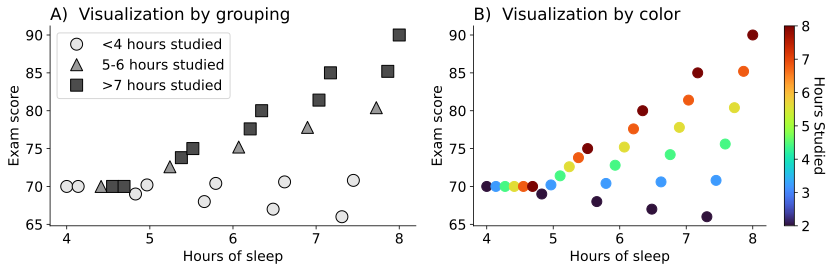

In [25]:
_,axs = plt.subplots(1,2,figsize=(12,4))

# plot by hours studied

# fewer than 4 hours studied
plotidx = hours_studied<4.1
axs[0].plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',
            markerfacecolor=(.9,.9,.9),markersize=12,label='<4 hours studied')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
axs[0].plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'k^',
            markerfacecolor=(.6,.6,.6),markersize=12,label='5-6 hours studied')

# more than 6 hours
plotidx = hours_studied>6
axs[0].plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ks',
            markerfacecolor=(.3,.3,.3),markersize=12,label='>7 hours studied')

axs[0].set(xlabel='Hours of sleep',ylabel='Exam score')
axs[0].legend()
axs[0].set_title(r'A)  Visualization by grouping')


h = axs[1].scatter(ave_sleep_hrs,exam_scores,s=100,c=hours_studied,cmap='turbo')
cbar = plt.colorbar(h,ax=axs[1]) # colorbar
cbar.set_label('Hours Studied',rotation=270,labelpad=15)
axs[1].set(xlabel='Hours of sleep',ylabel='Exam score')
axs[1].set_title(r'B)  Visualization by color')

plt.tight_layout()
plt.show()

### Fig 15.12: Multidimensional data in a multidimensional space

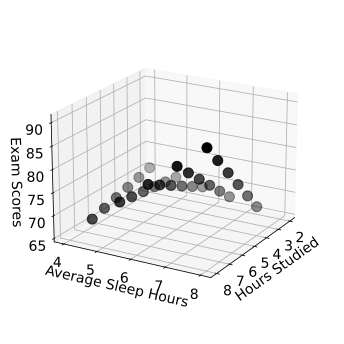

In [26]:
# 3D visualization of the data (but not practical)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hours_studied,ave_sleep_hrs,exam_scores,c='k',marker='o',s=100,facecolors=(.8,.8,.8))

ax.set(xlabel='Hours Studied',ylabel='Average Sleep Hours',zlabel='Exam Scores')
ax.set_box_aspect(aspect=None, zoom=.84)

# change view angle to increase interpretability
ax.view_init(elev=20,azim=30)

# display the figure
plt.tight_layout()
plt.show()
     


In [27]:
# put all data (IVs and DV) into one df

# construct the design matrix as a dataframe
df = pd.DataFrame({
    'ExamScores' : exam_scores,
    'Intercept'  : np.ones(len(exam_scores)),
    'StudyHours' : hours_studied,
    'SleepHours' : ave_sleep_hrs,
    'Interaction': hours_studied * ave_sleep_hrs
})

# show dataframe
df.head()

,ExamScores,Intercept,StudyHours,SleepHours,Interaction
0,70.0,1.0,2.0,4.000000,8.000000
1,70.0,1.0,3.2,4.137931,13.241379
2,70.0,1.0,4.4,4.275862,18.813793
3,70.0,1.0,5.6,4.413793,24.717241
4,70.0,1.0,6.8,4.551724,30.951724


### Fig 15.14: Piecewise regression

In [28]:
# create the data
N = 100
x = np.linspace(0,10,N)
bp = N//3 # break point (one-third of the way through)

# two different linear relationships
y1 = 1.2*x[:bp]
y2 =  .4*x[bp:]
y2 = y2-y2[0]+y1[-1] # shift y2 to follow y1

# combine the two parts with noise
y = np.concatenate([y1,y2]) + np.random.normal(0,.3,size=N)


In [29]:
# split the data
x1, y1 = x[x <= x[bp]], y[x <= x[bp]]
x2, y2 = x[x >  x[bp]], y[x >  x[bp]]


# fit separate linear regressions
reg1 = sm.OLS(y1,sm.add_constant(x1)).fit()
reg2 = sm.OLS(y2,sm.add_constant(x2)).fit()

# predictions
yHat1 = reg1.predict(sm.add_constant(x1))
yHat2 = reg2.predict(sm.add_constant(x2))

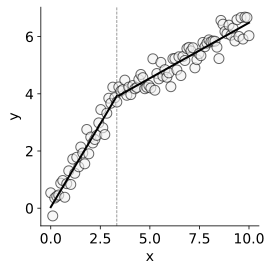

In [30]:
# plot
plt.figure(figsize=(4,4))
plt.plot(x,y,'ko',markerfacecolor=(.95,.95,.95),markersize=10,alpha=.6)
plt.plot(x1,yHat1,'k',linewidth=2)
plt.plot(x2,yHat2,'k',linewidth=2)
plt.axvline(x=x[bp],linestyle='--',color=(.5,.5,.5),zorder=-10,linewidth=.8)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### Fig 15.15: Polynomial design matrix

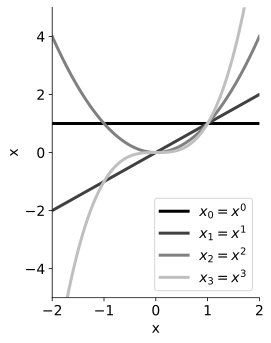

In [31]:
x = np.linspace(-2,2,101)

maxorder = 3


plt.figure(figsize=(4,5))

for i in range(maxorder+1):

  # this regressor
  xx = x**i

  # plot it
  c = i/(maxorder+1)
  plt.plot(x,xx,color=(c,c,c),linewidth=3,label=fr'$x_{i}=x^{i}$')


plt.xlim(x[[0,-1]])
plt.ylim([-5,5])
plt.xlabel('x')
plt.ylabel('x')
plt.legend()

plt.tight_layout()
plt.show()
     

### Fig 15.16: Polynomial regression

In [32]:
n = 30
x = np.linspace(-2,3,n)


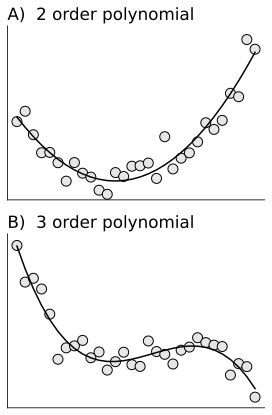

In [33]:
_,axs = plt.subplots(2,1,figsize=(4,6))

# generate data
y = x**2 + np.random.randn(n)

# beta coefficients 
polycoefs = np.polyfit(x,y,2)

# predictions
yHat = np.polyval(polycoefs,x)

# plot
axs[0].plot(x,y,'ko',markersize=10,markerfacecolor=(.9,.9,.9))
axs[0].set(xlim=[-2.2,3.2],ylim=[np.min(y)*1.3,np.max(y)*1.1],xticks=[],yticks=[])
axs[0].plot(x,yHat,color='k')
axs[0].set_title(r'A)  2 order polynomial')


# repeat for 3rd order polynomial
y = x**2 - .4*x**3 + np.random.randn(len(x))*.8
axs[1].plot(x,y,'ko',markersize=10,markerfacecolor=(.9,.9,.9))
axs[1].set(xlim=[-2.2,3.2],ylim=[np.min(y)*1.3,np.max(y)*1.1],xticks=[],yticks=[])
axs[1].plot(x,np.polyval(np.polyfit(x,y,3),x),color='k')
axs[1].set_title(r'B)  3 order polynomial')

plt.tight_layout()
plt.show()

### Fig 15.17: Polynomial order and overfitting

In [34]:
# plotting various orders
n = 30
x = np.linspace(-2,3,n)
y = x**2 - .4*x**3 + np.random.randn(n)*.8




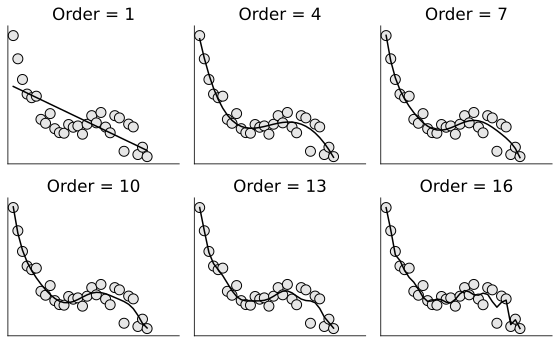

In [35]:
_,axs = plt.subplots(2,3,figsize=(8,5))

for oi,ax in enumerate(axs.flatten()):

  # order number
  order = oi*3+1

  ax.plot(x,y,'ko',markersize=10,markerfacecolor=(.9,.9,.9))
  ax.set(xlim=[-2.2,4.2],ylim=[np.min(y)*1.3,np.max(y)*1.1],xticks=[],yticks=[])
  ax.plot(x,np.polyval(np.polyfit(x,y,order),x),color='k')
  ax.set_title(f'Order = {order}',loc='center')

# display the figure
plt.tight_layout()
plt.show()
     

### Fig 15.18: Bayes Information Criteria (BIC)

In [36]:
# initialize
maxorder = 17
bic = np.zeros(maxorder)

for i in range(maxorder):
  yhat = np.polyval(np.polyfit(x,y,i),x)
  bic[i] = n*np.log( np.sum((yhat-y)**2) ) + i*np.log(n)

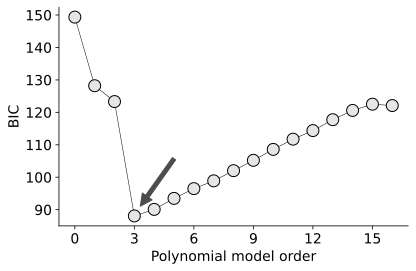

In [37]:
# plot
plt.figure(figsize=(6,4))
plt.plot(range(maxorder),bic,'ko-',markersize=12,markerfacecolor=(.9,.9,.9),linewidth=.5)
plt.xlabel('Polynomial model order')
plt.xticks(range(0,maxorder,3))
plt.ylabel('BIC')

# draw an arrow to the best BIC
bestK = np.argmin(bic)
plt.annotate('',xy=(bestK+.3,bic[bestK]+3),xytext=(bestK+2,bic[bestK]*1.2),
            arrowprops={'color':(.3,.3,.3)})


plt.tight_layout()
plt.show()

### Fig 15.19: Log of probabilities

In [38]:
p = np.linspace(.0001,.3,156)

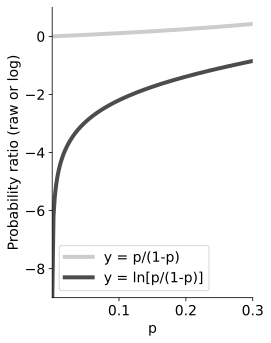

In [39]:
# plot
plt.figure(figsize=(4,5))
plt.plot(p,p/(1-p),color=(.8,.8,.8),linewidth=4,label='y = p/(1-p)')
plt.plot(p,np.log(p/(1-p)),color=(.3,.3,.3),linewidth=4,label='y = ln[p/(1-p)]')

# limits and labels
plt.ylim([-9,1])
plt.xlim(p[[0,-1]])
plt.xlabel('p')
plt.ylabel('Probability ratio (raw or log)')
plt.legend()

# display the figure
plt.tight_layout()
plt.show()

### Logistic regression example

In [40]:
# Generate data
N = 100
studyHours = np.random.uniform(0,10,N)

# the generating equation
pass_prob = 1 / (1 + np.exp(-(studyHours-5)))

# randomize pass/fail according to probability function
passed_exam = np.random.rand(N)

In [42]:
# build design matrix
X = np.vstack((np.ones(N),studyHours)).T

# test the model
model = sm.Logit(passed_exam,X).fit()
print(model.summary())
     


Optimization terminated successfully.
         Current function value: 0.691174
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 May 2025   Pseudo R-squ.:              -0.0009351
Time:                        22:44:33   Log-Likelihood:                -69.117
converged:                       True   LL-Null:                       -69.053
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.414     -0.030      0.976      -0.825       0.800
x1            -0.0151      0.